# IMPORTING IMPORTING LIBRARIES AND DATAFRAME

In [64]:
#IMPORTING LIBRARIES AND DATAFRAME

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [65]:
#ESTABLISHING PATH

path = r'/Users/MadrigalPaez/Documents/2 - FORMACIÓN Y TRABAJO/CAREER FOUNDRY/DATA ANALYTICS/2 - Data Immersion/Achievement 4 - Python Fundamentals for Data Analysts/08-2025 Instacart Grocery Basket Analysis'

In [66]:
path

'/Users/MadrigalPaez/Documents/2 - FORMACIÓN Y TRABAJO/CAREER FOUNDRY/DATA ANALYTICS/2 - Data Immersion/Achievement 4 - Python Fundamentals for Data Analysts/08-2025 Instacart Grocery Basket Analysis'

In [67]:
#IMPORTING DATAFRAME

orders_products_customers_aggregated_clean = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_aggregated_clean.pkl'))

In [68]:
orders_products_customers_aggregated_clean.head(5)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_day_of_week,...,customer_recurrence_flag,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income
0,1.0,Chocolate Sandwich Cookies,61.0,19.0,5.8,3139998.0,138.0,prior,28.0,6.0,...,Frequent customer,Charles,Cox,Male,Minnesota,81.0,2019-08-01,1.0,married,49620.0
1,1.0,Chocolate Sandwich Cookies,61.0,19.0,5.8,1977647.0,138.0,prior,30.0,6.0,...,Frequent customer,Charles,Cox,Male,Minnesota,81.0,2019-08-01,1.0,married,49620.0
2,1.0,Chocolate Sandwich Cookies,61.0,19.0,5.8,389851.0,709.0,prior,2.0,0.0,...,Frequent customer,Deborah,Glass,Female,Vermont,66.0,2018-06-16,2.0,married,158302.0
3,1.0,Chocolate Sandwich Cookies,61.0,19.0,5.8,652770.0,764.0,prior,1.0,3.0,...,Frequent customer,Heather,Myers,Female,Wisconsin,40.0,2020-02-09,3.0,married,31308.0
4,1.0,Chocolate Sandwich Cookies,61.0,19.0,5.8,1813452.0,764.0,prior,3.0,4.0,...,Frequent customer,Heather,Myers,Female,Wisconsin,40.0,2020-02-09,3.0,married,31308.0


In [69]:
orders_products_customers_aggregated_clean.shape

(32433030, 30)

In [70]:
orders_products_customers_aggregated_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32433030 entries, 0 to 32433029
Data columns (total 30 columns):
 #   Column                     Dtype   
---  ------                     -----   
 0   product_id                 float64 
 1   product_name               object  
 2   aisle_id                   float64 
 3   department_id              float64 
 4   prices                     float64 
 5   order_id                   float64 
 6   user_id                    float64 
 7   eval_set                   object  
 8   order_number               float64 
 9   order_day_of_week          float64 
 10  order_hour_of_day          float64 
 11  days_since_prior_order     float64 
 12  first_order                float64 
 13  add_to_cart_order          float64 
 14  reordered                  float64 
 15  max_order                  float64 
 16  loyalty_flag               object  
 17  avg_spend_by_product       float64 
 18  avg_spend_by_product_flag  object  
 19  customer_recurrence

# TASK 4.10

## Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis:

**The dataframe includes PII that we need to address. We must delete the columns "first_name" and "last_name"
, since by doing that we remove directly identifiable information and we keep the "user_id" as pseudonymous identifier.**

In [71]:
#DELETING "first_name" and "last_name" COLUMS FROM orders_products_customers_aggregated_clean

orders_products_customers_aggregated_clean = (orders_products_customers_aggregated_clean.drop(columns=["first_name", "last_name"]))

In [75]:
orders_products_customers_aggregated_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32433030 entries, 0 to 32433029
Data columns (total 29 columns):
 #   Column                     Dtype   
---  ------                     -----   
 0   product_id                 float64 
 1   product_name               object  
 2   aisle_id                   float64 
 3   department_id              float64 
 4   prices                     float64 
 5   order_id                   float64 
 6   user_id                    float64 
 7   eval_set                   object  
 8   order_number               float64 
 9   order_day_of_week          float64 
 10  order_hour_of_day          float64 
 11  days_since_prior_order     float64 
 12  first_order                float64 
 13  add_to_cart_order          float64 
 14  reordered                  float64 
 15  max_order                  float64 
 16  loyalty_flag               object  
 17  avg_spend_by_product       float64 
 18  avg_spend_by_product_flag  object  
 19  customer_recurrence

## The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set. Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions). Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.):

### CALCULATING AVG SPENT PER PRODUCT BY REGION

In [76]:
#DEFINING REGION MAP

region_map_us = {'Maine':'Northeast','New Hampshire':'Northeast','Vermont':'Northeast','Massachusetts':'Northeast','Rhode Island':'Northeast','Connecticut':'Northeast','New York':'Northeast','Pennsylvania':'Northeast','New Jersey':'Northeast','Wisconsin':'Midwest','Michigan':'Midwest','Illinois':'Midwest','Indiana':'Midwest','Ohio':'Midwest','North Dakota':'Midwest','South Dakota':'Midwest','Nebraska':'Midwest','Kansas':'Midwest','Minnesota':'Midwest','Iowa':'Midwest','Missouri':'Midwest','Delaware':'South','Maryland':'South','District of Columbia':'South','Virginia':'South','West Virginia':'South','North Carolina':'South','South Carolina':'South','Georgia':'South','Florida':'South','Kentucky':'South','Tennessee':'South','Mississippi':'South','Alabama':'South','Oklahoma':'South','Texas':'South','Arkansas':'South','Louisiana':'South','Idaho':'West','Montana':'West','Wyoming':'West','Nevada':'West','Utah':'West','Colorado':'West','Arizona':'West','New Mexico':'West','Alaska':'West','Washington':'West','Oregon':'West','California':'West','Hawaii':'West'}

In [77]:
#CREATING NEW "region" COLUMN

orders_products_customers_aggregated_clean['region'] = orders_products_customers_aggregated_clean['state'].map(region_map_us)

In [78]:
orders_products_customers_aggregated_clean.head(5)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_day_of_week,...,customer_recurrence,customer_recurrence_flag,gender,state,age,date_joined,n_dependants,fam_status,income,region
0,1.0,Chocolate Sandwich Cookies,61.0,19.0,5.8,3139998.0,138.0,prior,28.0,6.0,...,8.0,Frequent customer,Male,Minnesota,81.0,2019-08-01,1.0,married,49620.0,Midwest
1,1.0,Chocolate Sandwich Cookies,61.0,19.0,5.8,1977647.0,138.0,prior,30.0,6.0,...,8.0,Frequent customer,Male,Minnesota,81.0,2019-08-01,1.0,married,49620.0,Midwest
2,1.0,Chocolate Sandwich Cookies,61.0,19.0,5.8,389851.0,709.0,prior,2.0,0.0,...,8.0,Frequent customer,Female,Vermont,66.0,2018-06-16,2.0,married,158302.0,Northeast
3,1.0,Chocolate Sandwich Cookies,61.0,19.0,5.8,652770.0,764.0,prior,1.0,3.0,...,9.0,Frequent customer,Female,Wisconsin,40.0,2020-02-09,3.0,married,31308.0,Midwest
4,1.0,Chocolate Sandwich Cookies,61.0,19.0,5.8,1813452.0,764.0,prior,3.0,4.0,...,9.0,Frequent customer,Female,Wisconsin,40.0,2020-02-09,3.0,married,31308.0,Midwest


In [79]:
#GROUPING "avg_spend_by_product" BY REGION

region_avg_spending_product = (orders_products_customers_aggregated_clean.groupby('region')['avg_spend_by_product'].mean().reset_index().sort_values(by='avg_spend_by_product', ascending=False))

In [80]:
region_avg_spending_product

,region,avg_spend_by_product
0,Midwest,12.664951
2,South,12.147164
1,Northeast,11.514999
3,West,11.272132


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Midwest'),
  Text(1, 0, 'South'),
  Text(2, 0, 'Northeast'),
  Text(3, 0, 'West')])

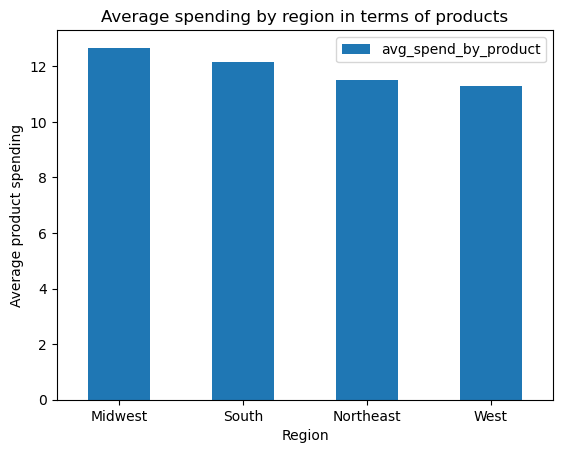

In [81]:
#CREATING "Average spending by region in terms of products" BAR CHART 

region_avg_spending_product.plot(x='region',y='avg_spend_by_product',kind='bar')

plt.title("Average spending by region in terms of products")
plt.xlabel("Region")
plt.ylabel("Average product spending")
plt.xticks(rotation=0)

**In terms of product spending, the Midwest is the region with the highest average spend per product (12.66), followed closely by the South, Northeast, and West. The differences between the four regions are relatively small: the gap between the highest (Midwest at 12.66) and the lowest (West at 11.27) is only 1.39 per product on average. This suggests that customer spending habits per product are fairly consistent and almost equal across all U.S. regions. For further insights, we can analyze both total spend and average spend by region to identify whether any region consistently spends more overall or per purchase.**

### CALCULATING AVG SPEND AND TOTAL SPEND BY REGION

In [82]:
#CALCULATING TOTAL SPENDING

region_total_spending = orders_products_customers_aggregated_clean.groupby('region')['prices'].sum()

In [83]:
region_total_spending

region
Midwest      59275658.1
Northeast    44601511.4
South        84231139.5
West         64691094.6
Name: prices, dtype: float64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Midwest'),
  Text(1, 0, 'Northeast'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West')])

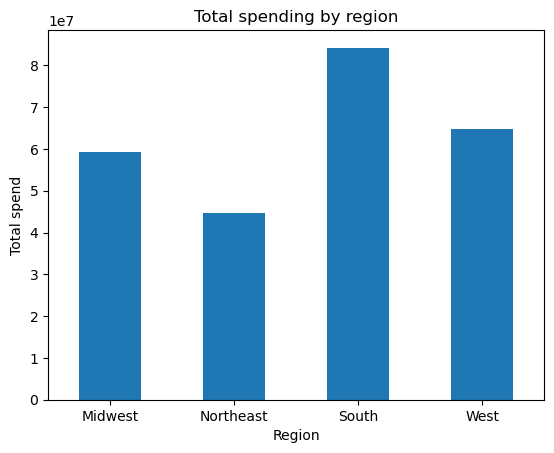

In [85]:
#CREATING "Total spending by region" BAR CHART 

region_total_spending.plot(x='region',y='region_total_spending',kind='bar')

plt.title("Total spending by region")
plt.xlabel("Region")
plt.ylabel("Total spend")
plt.xticks(rotation=0)

**In terms of total revenue, South is the region that brings more revenue (84,231,139), followed by West (64,691,094), Midwest (59,275,658), and Northeast (44,601,511)**

In [86]:
#CALCULATING TOTAL SPEND BY CUSTOMER

customer_total_spend = orders_products_customers_aggregated_clean.groupby('user_id')['prices'].sum().reset_index()

In [87]:
#COMBINING CUSTOMERS AND REGIONS

customer_region = orders_products_customers_aggregated_clean[['user_id', 'region']].drop_duplicates()
customer_total_spend = customer_total_spend.merge(customer_region, on='user_id')

In [88]:
#CALCULATING AVG SPEND PER USER BY REGION

region_avg_spending_by_user = customer_total_spend.groupby('region')['prices'].mean().reset_index()
region_avg_spending_by_user.rename(columns={'prices': 'avg_spend'}, inplace=True)

In [89]:
region_avg_spending_by_user.sort_values(by='avg_spend', ascending=False)

,region,avg_spend
3,West,1230.687617
1,Northeast,1225.720331
2,South,1225.411925
0,Midwest,1221.699913


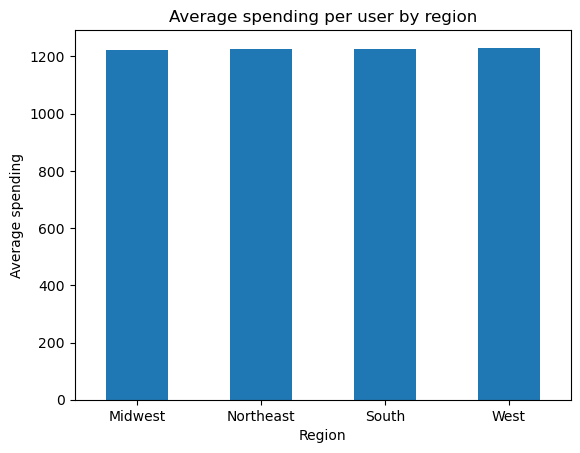

In [90]:
#CREATING "Average spending per user by region" BAR CHART

region_avg_spending_by_user.plot(x='region', y='avg_spend', kind='bar', legend=False)
plt.title("Average spending per user by region")
plt.xlabel("Region")
plt.ylabel("Average spending")
plt.xticks(rotation=0)
plt.show()

**As we can see in the graph, the average spend per user by region is relatively consistent across all regions, similar to the pattern observed for the average price per product sold. While West shows the highest average spend per user w/ 1230, followed by Northeast, South, and Midwest, the differences between regions are small.**

## The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample:

In [91]:
#CREATING A NEW "activity_level" COLUMN

orders_products_customers_aggregated_clean['low_activity_level_flag'] = False

In [92]:
orders_products_customers_aggregated_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32433030 entries, 0 to 32433029
Data columns (total 30 columns):
 #   Column                     Dtype   
---  ------                     -----   
 0   product_id                 float64 
 1   product_name               object  
 2   aisle_id                   float64 
 3   department_id              float64 
 4   prices                     float64 
 5   order_id                   float64 
 6   user_id                    float64 
 7   eval_set                   object  
 8   order_number               float64 
 9   order_day_of_week          float64 
 10  order_hour_of_day          float64 
 11  days_since_prior_order     float64 
 12  first_order                float64 
 13  add_to_cart_order          float64 
 14  reordered                  float64 
 15  max_order                  float64 
 16  loyalty_flag               object  
 17  avg_spend_by_product       float64 
 18  avg_spend_by_product_flag  object  
 19  customer_recurrence

In [93]:
#GROUPING TOTAL ORDERS PER USER
user_orders = orders_products_customers_aggregated_clean.groupby('user_id')['order_id'].nunique()

In [94]:
#FILTERING AND ADDING DATA TO "activity_level" COLUMN

low_activity = user_orders[user_orders < 5].index
orders_products_customers_aggregated_clean.loc[orders_products_customers_aggregated_clean['user_id'].isin(low_activity), 'low_activity_level_flag'] = True

In [96]:
orders_products_customers_aggregated_clean[orders_products_customers_aggregated_clean['low_activity_level_flag'] == True].head(5)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_day_of_week,...,customer_recurrence_flag,gender,state,age,date_joined,n_dependants,fam_status,income,region,low_activity_level_flag
3,1.0,Chocolate Sandwich Cookies,61.0,19.0,5.8,652770.0,764.0,prior,1.0,3.0,...,Frequent customer,Female,Wisconsin,40.0,2020-02-09,3.0,married,31308.0,Midwest,True
4,1.0,Chocolate Sandwich Cookies,61.0,19.0,5.8,1813452.0,764.0,prior,3.0,4.0,...,Frequent customer,Female,Wisconsin,40.0,2020-02-09,3.0,married,31308.0,Midwest,True
34,1.0,Chocolate Sandwich Cookies,61.0,19.0,5.8,2434812.0,1598.0,prior,1.0,2.0,...,Frequent customer,Male,Kansas,41.0,2018-01-07,2.0,married,122060.0,Midwest,True
35,1.0,Chocolate Sandwich Cookies,61.0,19.0,5.8,1531889.0,1598.0,prior,2.0,2.0,...,Frequent customer,Male,Kansas,41.0,2018-01-07,2.0,married,122060.0,Midwest,True
36,1.0,Chocolate Sandwich Cookies,61.0,19.0,5.8,726947.0,1598.0,prior,3.0,4.0,...,Frequent customer,Male,Kansas,41.0,2018-01-07,2.0,married,122060.0,Midwest,True


In [97]:
#CREATING NEW DATAFRAME INCLUDING ONLY NON "low_activity_level" CUSTOMERS

active_customers = orders_products_customers_aggregated_clean[orders_products_customers_aggregated_clean['low_activity_level_flag'] == False].copy()

In [98]:
active_customers.head(5)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_day_of_week,...,customer_recurrence_flag,gender,state,age,date_joined,n_dependants,fam_status,income,region,low_activity_level_flag
0,1.0,Chocolate Sandwich Cookies,61.0,19.0,5.8,3139998.0,138.0,prior,28.0,6.0,...,Frequent customer,Male,Minnesota,81.0,2019-08-01,1.0,married,49620.0,Midwest,False
1,1.0,Chocolate Sandwich Cookies,61.0,19.0,5.8,1977647.0,138.0,prior,30.0,6.0,...,Frequent customer,Male,Minnesota,81.0,2019-08-01,1.0,married,49620.0,Midwest,False
2,1.0,Chocolate Sandwich Cookies,61.0,19.0,5.8,389851.0,709.0,prior,2.0,0.0,...,Frequent customer,Female,Vermont,66.0,2018-06-16,2.0,married,158302.0,Northeast,False
5,1.0,Chocolate Sandwich Cookies,61.0,19.0,5.8,1701441.0,777.0,prior,16.0,1.0,...,Regular customer,Female,Hawaii,51.0,2019-01-04,2.0,married,57797.0,West,False
6,1.0,Chocolate Sandwich Cookies,61.0,19.0,5.8,1871483.0,825.0,prior,3.0,2.0,...,Regular customer,Male,District of Columbia,20.0,2019-05-08,3.0,living with parents and siblings,34171.0,South,False


In [99]:
#EXPORTING active_customers DATAFRAME

active_customers.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'active_customers.pkl'))

## The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [100]:
#ANALYZING AVAILABLE CUSTOMERS SOCIODEMOGRAPHIC DATA ("age", "fam_status", and "n_dependants")

orders_products_customers_aggregated_clean.describe()

,product_id,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,add_to_cart_order,reordered,max_order,avg_spend_by_product,customer_recurrence,age,n_dependants,income
count,3.242860e+07,3.242860e+07,3.242860e+07,3.242790e+07,3.242860e+07,3.242860e+07,3.242860e+07,3.242860e+07,3.242860e+07,3.035093e+07,3.242860e+07,3.242860e+07,3.242860e+07,3.242860e+07,3.242860e+07,3.242860e+07,3.242860e+07,3.242860e+07,3.242860e+07
mean,2.557804e+04,7.120986e+01,9.921271e+00,7.795737e+00,1.710747e+06,1.029372e+05,1.714221e+01,2.738816e+00,1.342498e+01,1.110402e+01,6.406906e-02,8.351128e+00,5.896882e-01,3.305260e+01,1.193297e+01,1.039773e+01,4.946521e+01,1.501871e+00,9.941704e+04
std,1.409713e+04,3.820405e+01,6.281284e+00,4.243219e+00,9.873004e+05,5.946654e+04,1.753499e+01,2.090060e+00,4.246362e+00,8.778897e+00,2.448759e-01,7.126659e+00,4.918903e-01,2.515448e+01,8.299517e+01,7.131215e+00,1.848554e+01,1.118872e+00,4.301005e+04
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,1.353500e+04,3.100000e+01,4.000000e+00,4.200000e+00,8.559430e+05,5.141700e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,1.300000e+01,7.391841e+00,6.000000e+00,3.300000e+01,1.000000e+00,6.699500e+04
50%,2.526500e+04,8.300000e+01,9.000000e+00,7.400000e+00,1.711048e+06,1.026130e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,0.000000e+00,6.000000e+00,1.000000e+00,2.600000e+01,7.829412e+00,8.000000e+00,4.900000e+01,2.000000e+00,9.660800e+04
75%,3.794000e+04,1.070000e+02,1.600000e+01,1.130000e+01,2.565510e+06,1.543910e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,0.000000e+00,1.100000e+01,1.000000e+00,4.700000e+01,8.258333e+00,1.300000e+01,6.500000e+01,3.000000e+00,1.278850e+05
max,4.968800e+04,1.340000e+02,2.100000e+01,2.500000e+01,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,1.000000e+00,1.450000e+02,1.000000e+00,9.900000e+01,2.500542e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


In [101]:
orders_products_customers_aggregated_clean['fam_status'].unique()

['married', 'living with parents and siblings', 'divorced/widowed', 'single', NaN]
Categories (4, object): ['divorced/widowed', 'living with parents and siblings', 'married', 'single']

In [102]:
orders_products_customers_aggregated_clean['n_dependants'].unique()

array([ 1.,  2.,  3.,  0., nan])

**In order to create sociodemographic profiles, we first need to analyze our customers’ data in terms of age, relationship status, and number of dependents. Based on this, we can define representative groups within our customer base. Once these groups are established, we can enrich the analysis by incorporating additional variables such as income and then cross-reference the data to identify trends in total spend, product choices, department, etc. Since the current dataframe and notebook are quite heavy, I have carried out this customer analysis in a separate notebook (attached in the task documents) to improve efficiency and clarity.**

I have identified the following categories, and create a new column named "customer_profile_demo" in the new "customer_socioeconomic_profiles" dataframe:

- divorced/widowed no dependents (we just have customers 51+ years old in this category)
- living with parents and siblings (we just have customers 18-25 years old in this category)
- married w/ dependents 18-25
- married w/ dependents 26-35
- married w/ dependents 36-50
- married w/ dependents 51+
- single no dependents 18-25
- single no dependents 26-35
- single no dependents 36-50
- single no dependents 51+

In [103]:
#IMPORTING DATAFRAME

customer_socioeconomic_profiles = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_socioeconomic_profiles.pkl'))

In [104]:
customer_socioeconomic_profiles.head(5)

,product_name,department_id,prices,user_id,order_day_of_week,order_hour_of_day,days_since_prior_order,loyalty_flag,avg_spend_by_product,income,region,customer_profile_demo
0,Chocolate Sandwich Cookies,19.0,5.8,138.0,6.0,11.0,3.0,Regular customer,6.935811,49620.0,Midwest,married w/ dependents 51+
1,Chocolate Sandwich Cookies,19.0,5.8,138.0,6.0,17.0,20.0,Regular customer,6.935811,49620.0,Midwest,married w/ dependents 51+
2,Chocolate Sandwich Cookies,19.0,5.8,709.0,0.0,21.0,6.0,New customer,7.930208,158302.0,Northeast,married w/ dependents 51+
5,Chocolate Sandwich Cookies,19.0,5.8,777.0,1.0,7.0,26.0,Regular customer,6.935398,57797.0,West,married w/ dependents 51+
6,Chocolate Sandwich Cookies,19.0,5.8,825.0,2.0,14.0,30.0,New customer,5.957576,34171.0,South,living with parents and siblings


In [105]:
#CROSSING SOCIODEMOGRAPHIC PROFILES W/ INCOME

profiles_income = (customer_socioeconomic_profiles.groupby("customer_profile_demo")["income"].agg(count="count", mean_income="mean", max_income="max").reset_index()).sort_values(by="mean_income", ascending=False)

In [106]:
profiles_income

,customer_profile_demo,count,mean_income,max_income
9,single no dependents 51+,1115937,116248.889285,544248.0
0,divorced/widowed no dependents,2647260,115949.125552,578251.0
5,married w/ dependents 51+,11195523,115670.906640,593901.0
8,single no dependents 36-50,1803151,101581.964775,584097.0
4,married w/ dependents 36-50,5480154,101385.320618,592409.0
2,married w/ dependents 18-25,1431124,70858.645328,382720.0
1,living with parents and siblings,1482402,70854.959342,396364.0
6,single no dependents 18-25,953929,70614.395551,385324.0
7,single no dependents 26-35,1225434,70531.371344,387860.0
3,married w/ dependents 26-35,3652359,70462.573123,392552.0


Text(0, 0.5, 'Income')

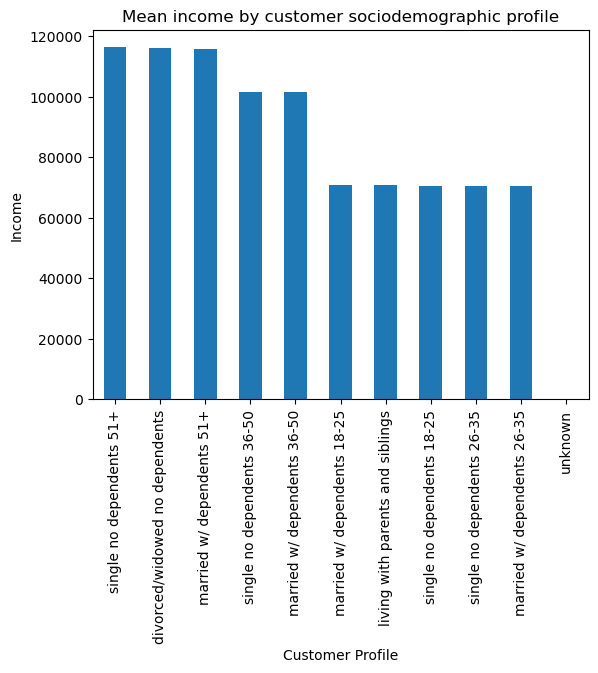

In [107]:
#CREATING "Mean income by customer sociodemographic profile" BAR CHART

profiles_income.plot(x='customer_profile_demo', y='mean_income', kind='bar', legend=False)
plt.title("Mean income by customer sociodemographic profile")
plt.xlabel("Customer Profile")
plt.ylabel("Income")

In [109]:
#ANALYZING DEPARTMENT DATA (REVENUE AND ORDERS) BY DEMOGRAPHIC PROFILES

profiles_department_total = (customer_socioeconomic_profiles.groupby(["department_id", "customer_profile_demo"]).agg(orders=("product_name", "count"),total_spend=("prices", "sum")).reset_index())
profiles_department_max = (profiles_department_total.loc[profiles_department_total.groupby("department_id")["orders"].idxmax()].reset_index(drop=True))

In [110]:
profiles_department_max

,department_id,customer_profile_demo,orders,total_spend
0,1.0,married w/ dependents 51+,770847,5960117.0
1,2.0,married w/ dependents 51+,12403,86081.5
2,3.0,married w/ dependents 51+,406891,3207873.4
3,4.0,married w/ dependents 51+,3275880,26132497.1
4,5.0,married w/ dependents 51+,50665,413958.8
5,6.0,married w/ dependents 51+,91564,704533.0
6,7.0,married w/ dependents 51+,938970,7218988.7
7,8.0,married w/ dependents 51+,33683,266323.2
8,9.0,married w/ dependents 51+,298469,2193085.7
9,10.0,married w/ dependents 51+,12130,101191.2


**The group “single no dependents 51+” shows the highest average income, closely followed by “divorced/widowed no dependents” and “married w/ dependents 51+”*. However, when looking at total spend, the group “married w/ dependents 51+” segment consistently emerges as the top spender across all departments.**

## Create an appropriate visualization to show the distribution of profiles:

In [111]:
#COUNT TOTAL CUSTOMERS OF EACH PROFILE

profile_counts = customer_socioeconomic_profiles['customer_profile_demo'].value_counts().reindex(['divorced/widowed no dependents','living with parents and siblings','married w/ dependents 18-25','married w/ dependents 26-35','married w/ dependents 36-50','married w/ dependents 51+','single no dependents 18-25','single no dependents 26-35','single no dependents 36-50','single no dependents 51+'])

Text(0.5, 1.0, 'Distribution of customers by profile group')

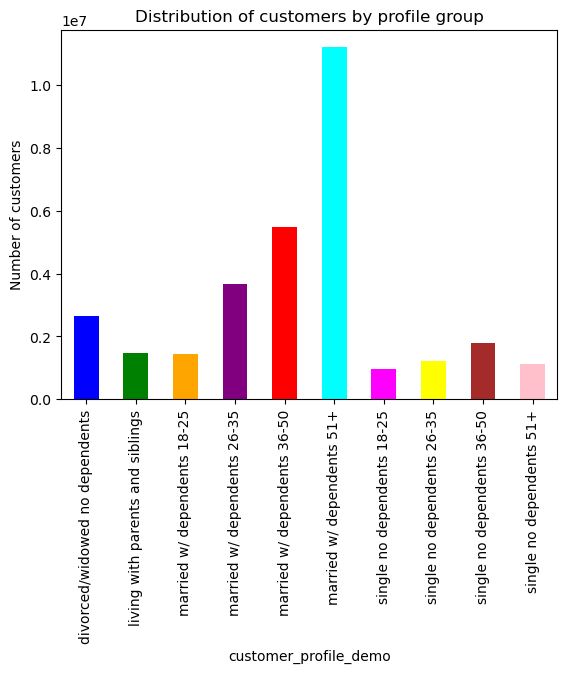

In [112]:
#CREATING "Distribution of customers by profile group" BAR CHART

profile_counts.plot(kind='bar', color=['blue', 'green', 'orange', 'purple', 'red', 'cyan', 'magenta', 'yellow', 'brown', 'pink'])
plt.ylabel("Number of customers")
plt.title("Distribution of customers by profile group")

## Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important:

In [113]:
#COUNT CUSTOMERS PER REGION BY CUSTOMER PROFILE

profile_region_counts = (customer_socioeconomic_profiles.groupby(["region", "customer_profile_demo"]).size().unstack(fill_value=0))

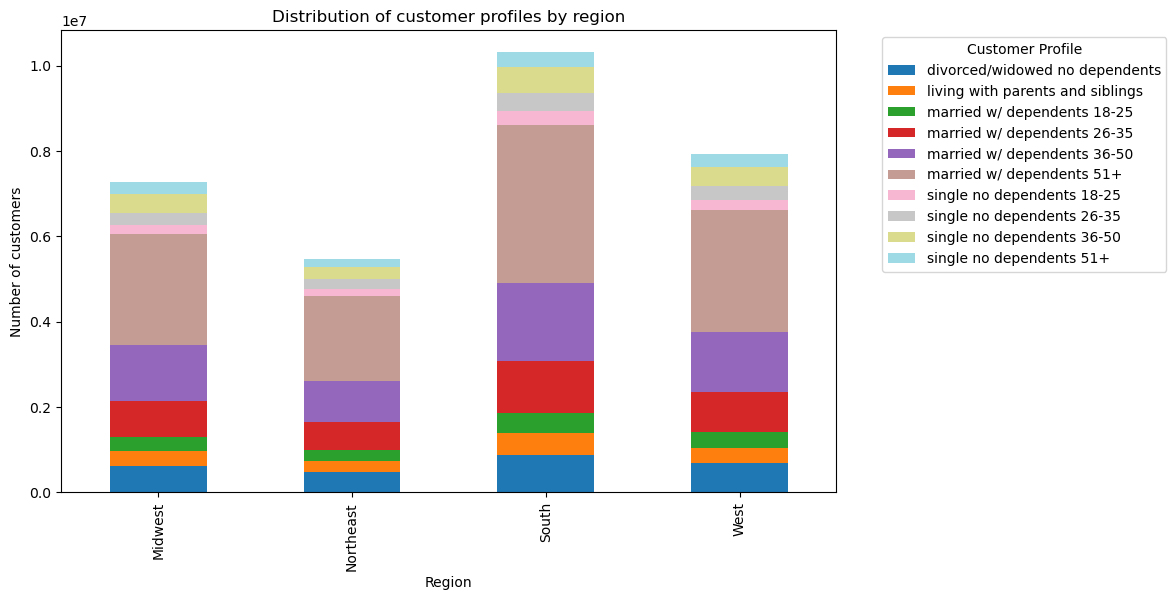

In [114]:
#CREATING "Distribution of customer profiles by region" STACKED BAR CHART

profile_region_counts.plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab20')
plt.ylabel("Number of customers")
plt.xlabel("Region")
plt.title("Distribution of customer profiles by region")
plt.legend(title="Customer Profile", bbox_to_anchor=(1.05, 1), loc='upper left')

In [115]:
#COUNT CUSTOMERS PER DEPARTMENT BY CUSTOMER PROFILE

profile_department_counts = (customer_socioeconomic_profiles.groupby(["department_id", "customer_profile_demo"]).size().unstack(fill_value=0))

Text(0.5, 1.0, 'Distribution of customer profiles purchases by department')

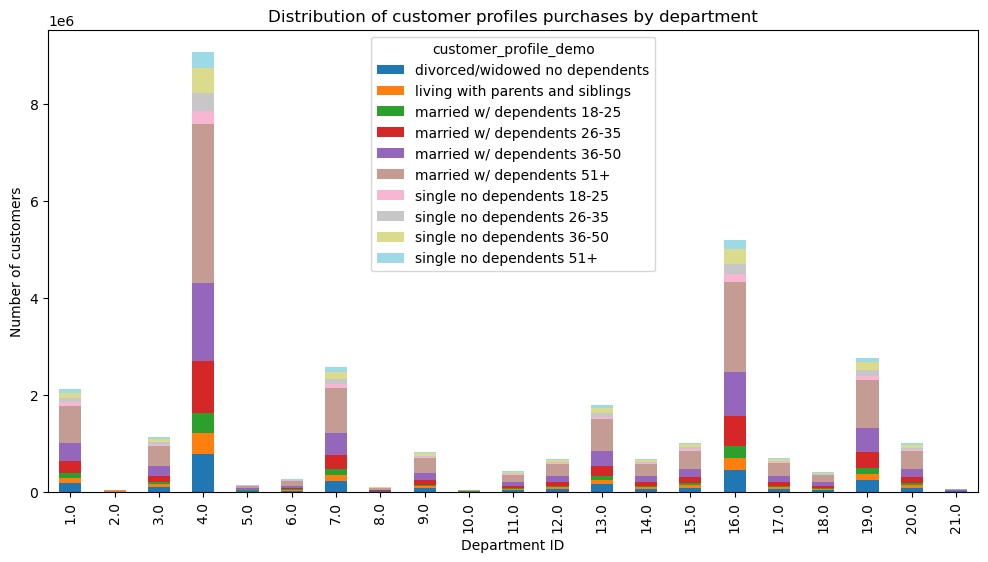

In [117]:
#CREATING "Distribution of customer profiles purchases by department" STACKED BAR CHART

profile_department_counts.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.ylabel("Number of customers")
plt.xlabel("Department ID")
plt.title("Distribution of customer profiles purchases by department")

In both cases (region and department) the biggest customer profile groups are the same:
- married w/ dependents 51+
- married w/ dependents 36-50
- married w/ dependents 26-35